## パーセプトロン

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
X = iris.data

In [5]:
y = iris.target

In [6]:
# 分類問題の時は標準化する
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [7]:
# 完全に線形分離可能な特徴にする。
X_1 = X_std[0:100, [2, 3]]
y_1 = y[:100]

In [8]:
# データセットの分割
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

In [9]:
from sklearn.linear_model import Perceptron
ppn_1 = Perceptron(eta0=0.1) # 学習率 0.1
ppn_1.fit(X_1_train, y_1_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [10]:
# 正答率を出力
# scoreで正答率
print('train acc: %.3f' % ppn_1.score(X_1_train, y_1_train))
print('test acc: %.3f' % ppn_1.score(X_1_test, y_1_test))

train acc: 1.000
test acc: 1.000


In [11]:
# versinica含むすべてのサンプルを選択
# sepal lengthとpetal lengthを利用
X_2 = X_std[:,[2, 3]]
y_2 = y

In [13]:
from sklearn.model_selection import train_test_split
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [14]:
# パーセプトロンの学習
from sklearn.linear_model import Perceptron
ppn_2 = Perceptron(eta0=0.1)
ppn_2.fit(X_2_train, y_2_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [15]:
print('train acc: %.3f' % ppn_2.score(X_2_train, y_2_train))
print('test acc: %.3f' % ppn_2.score(X_2_test, y_2_test))

train acc: 0.895
test acc: 0.889


## ロジスティック回帰

In [17]:
# brest_cancerデータセットの読み込み
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
# データをDataFrameに変換
df_data = pd.DataFrame(bc.data, columns=bc.feature_names)
df_target = pd.DataFrame(bc.target, columns=['class'])
df = pd.concat([df_data, df_target], axis=1)
# 説明変数と目的変数を指定
X = df.loc[:, ['worst perimeter', 'mean concave points']].values
y = df.loc[:, ['class']].values
# scikit-learnの仕様に合わせて､一列のベクトルに変換
y = y.reshape(-1)

In [18]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [19]:
# データセットの分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1) #Cは逆正則化パラメータ:λの逆数
lr.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
# 正答率を出力
print('train acc: %.3f' % lr.score(X_train, y_train))
print('test acc: %.3f' % lr.score(X_test, y_test))

train acc: 0.930
test acc: 0.924


## SVM

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
X_1 = iris.data[:100,[2,3]]
y_1 = iris.target[:100]

In [23]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_1)
X_1_std = scaler.transform(X_1)

In [25]:
# ホールド・アウト法による分割
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1_std, y_1, test_size=0.3, random_state=0)

In [28]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_1_train,y_1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
print("train:%.3f"%svc.score(X_1_train, y_1_train))
print("test:%.3f"%svc.score(X_1_test, y_1_test))

train:1.000
test:1.000


In [30]:
# irisデータセットの読み込み
# 品種: VersicolourとVirsiniga（線形分離不可能①）
# 変数: petal lengthとpetal width
from sklearn.datasets import load_iris
iris = load_iris()
X_2 = iris.data[50:150,[2,3]]
y_2 = iris.target[50:150]

In [31]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler_2 = StandardScaler()
scaler_2.fit(X_2)
X_2_std = scaler.transform(X_2)

In [35]:
# ホールド・アウト法による分割
from sklearn.model_selection import train_test_split
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2_std, y_2, test_size=0.3, random_state=0)
# 線形SVCの学習
from sklearn.svm import SVC
svc_slack = SVC(kernel='rbf', C=1.0)
svc_slack.fit(X_2_train, y_2_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
print("train:%.3f"%svc_slack.score(X_2_train, y_2_train))
print("test:%.3f"%svc_slack.score(X_2_test, y_2_test))

train:0.929
test:0.967


### 線形分離不可能 xor型

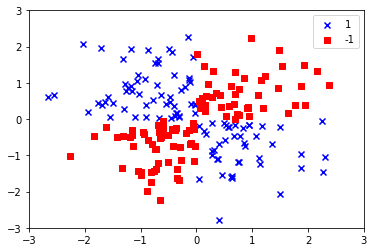

In [37]:
# XORのデータの作成
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# データのプロット
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best') # 右上に凡例を出力
plt.show()

In [38]:
# ホールド・アウト法による分割
from sklearn.model_selection import train_test_split
X_xor_train, X_xor_test, y_xor_train, y_xor_test = train_test_split(X_xor, y_xor, test_size=0.3, random_state=0)

In [39]:
# カーネルSVMによる学習
# C: 誤分類への厳しさ
# gamma: 決定曲線の複雑さ
rbf_svm = SVC(kernel='rbf', gamma=0.1, C=10) #gammaは空間の歪め度合いを表す
rbf_svm.fit(X_xor, y_xor)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
print("train:%.3f"%rbf_svm.score(X_xor_train, y_xor_train))
print("test:%.3f"%rbf_svm.score(X_xor_test, y_xor_test))

train:0.943
test:0.967
